<a href="https://colab.research.google.com/github/Pragna235/K-Nearest-Neighbors-Algorithm/blob/main/Weight_Height_BMI_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weight Height BMI Dataset using KNN Algorithm

Importing Modules

In [43]:
# Load libraries
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

Loading Dataset

In [44]:
data = pd.read_csv("/content/weight_height_bmi_dataset.csv")
data.head()

,Weight (kg),Height (m),BMI,Category
0,84,1.646838,30.972589,Overweight
1,87,1.483984,39.505820,Overweight
2,104,1.419933,51.581904,Overweight
3,107,1.989545,27.031880,Overweight
4,107,1.623974,40.571904,Overweight


In [45]:
data.tail()

,Weight (kg),Height (m),BMI,Category
195,63,1.870189,18.012320,Underweight
196,93,1.733858,30.935424,Overweight
197,91,1.495920,40.665350,Overweight
198,86,1.486298,38.930223,Overweight
199,60,1.789678,18.732750,Normal weight


In [46]:
data.shape

(200, 4)

In [47]:
data.describe()

,Weight (kg),Height (m),BMI
count,200.000000,200.000000,200.000000
mean,79.470000,1.708833,27.967694
std,23.315384,0.169872,10.144165
min,40.000000,1.400033,10.754109
25%,60.000000,1.561355,20.038243
50%,79.500000,1.694926,27.090918
75%,98.250000,1.850700,32.960813
max,119.000000,1.995438,59.487289


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weight (kg)  200 non-null    int64  
 1   Height (m)   200 non-null    float64
 2   BMI          200 non-null    float64
 3   Category     200 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.4+ KB


In [49]:
# Number of instances that belong to each class
print(data.groupby('Category').size())

Category
Normal weight     45
Overweight       115
Underweight       40
dtype: int64


In [50]:
le = LabelEncoder()
data['Category']= le.fit_transform(data['Category'])

In [51]:
data['Category'].unique()

array([1, 2, 0])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weight (kg)  200 non-null    int64  
 1   Height (m)   200 non-null    float64
 2   BMI          200 non-null    float64
 3   Category     200 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.4 KB


In [53]:
# Number of instances that belong to each class
print(data.groupby('Category').size())

Category
0     45
1    115
2     40
dtype: int64


Now,we convered our output attribute from categorical to numerical using label encoding.

Check for duplicates

In [54]:
data.duplicated().sum()

0

No duplicate rows.

Check for missing values

In [55]:
data.isnull().sum()

Weight (kg)    0
Height (m)     0
BMI            0
Category       0
dtype: int64

No, missing values.

Data Visualization

Text(0, 0.5, 'Count')

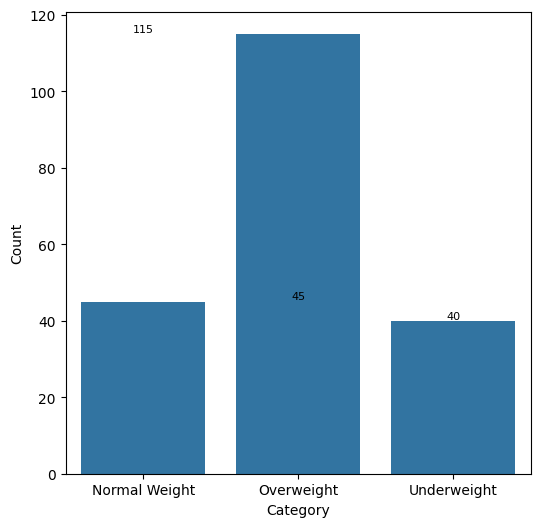

In [56]:
# Checking the balance of the data by plotting the count of outcomes by their values

plt.figure(figsize=(6,6))
fh_status = sns.countplot(x='Category', data=data)

for number,count in enumerate(data['Category'].value_counts()):
    fh_status.text(number,count, str(count), ha='center', va='bottom', fontsize=8, color='black')

plt.xticks([0, 1, 2], ['Normal Weight', 'Overweight', 'Underweight'])
plt.xlabel('Category')
plt.ylabel('Count')

Feature Scaling

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140')])

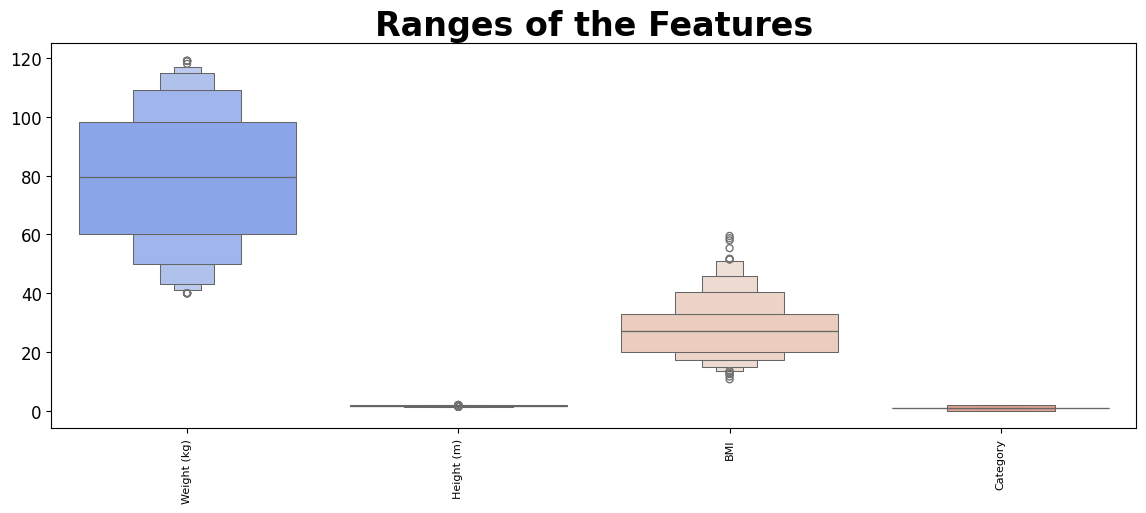

In [57]:
# Ranges of the features
plt.figure(figsize=(14, 5))
sns.boxenplot(data=data, palette='coolwarm')

plt.title('Ranges of the Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

In [58]:
# Splitting data into features (X) and outcomes (y)
X = data.drop(["Category"], axis=1)
y = data["Category"]

In [59]:
# Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = StandardScaler()

X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

In [60]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight (kg),200.0,5.773160e-17,1.002509,-1.697122,-0.837166,0.001290,0.807498,1.699702
Height (m),200.0,1.050271e-15,1.002509,-1.822400,-0.870349,-0.082071,0.837239,1.691418
BMI,200.0,-8.881784e-18,1.002509,-1.701153,-0.783638,-0.086648,0.493451,3.114962


(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

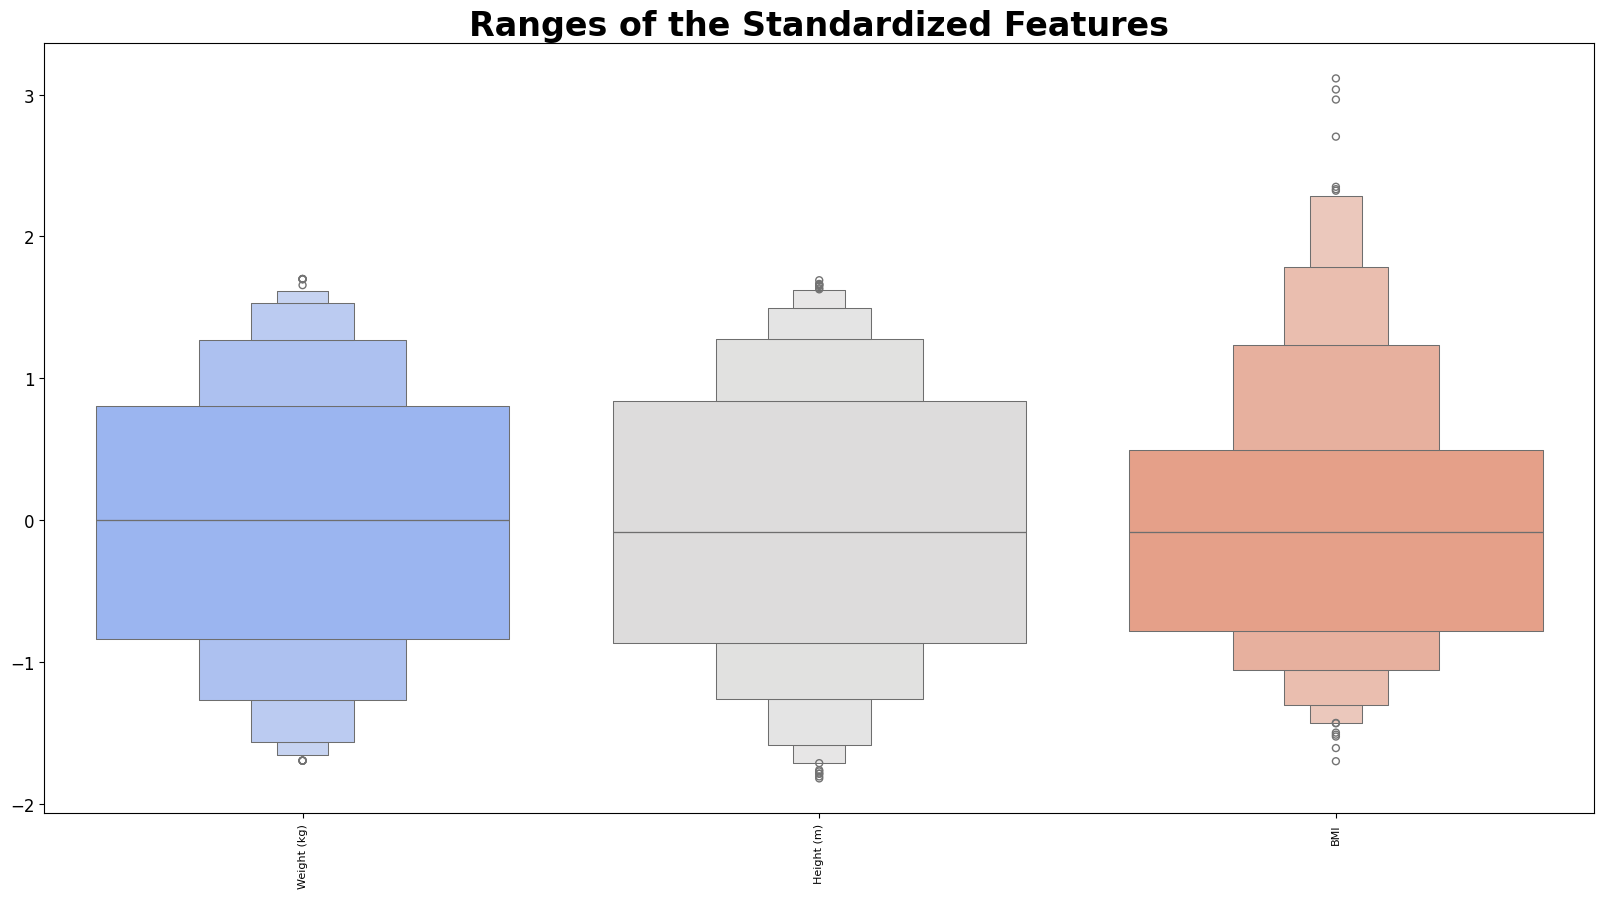

In [61]:
# Plot the standardized features
plt.figure(figsize=(20, 10))
sns.boxenplot(data=X_df, palette='coolwarm')

plt.title('Ranges of the Standardized Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

Model Evaluation

In [62]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

KNN Algorithm

In [63]:
test_scores=[]
train_scores=[]

for i in range(1,15):
  knn=KNeighborsClassifier(i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [64]:
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v==max_train_score]
print("Max train score = ",max_train_score*100," and k = ",list(map(lambda x:x+1,train_scores_ind)))

Max train score =  100.0  and k =  [1]


In [65]:
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v==max_test_score]
print("Max test score = ",max_test_score*100," and k = ",list(map(lambda x:x+1,test_scores_ind)))

Max test score =  95.0  and k =  [3, 4, 5, 10, 12, 14]


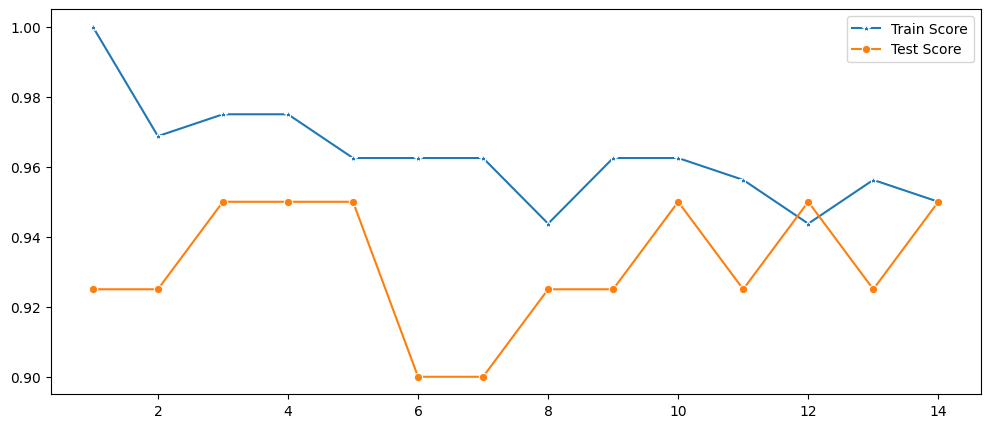

In [66]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores,marker='o',label='Test Score')
plt.show()

Best score is captured at k =  [3, 4, 5, 10, 12, 14]. Let us take k=3


In [67]:
knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
y_pred = knn.predict(X_test)
print("Accuracy Score of KNN : ",accuracy_score(y_test,y_pred)*100)

Accuracy Score of KNN :  95.0


Text(0.5, 3.722222222222216, 'Predicted Label')

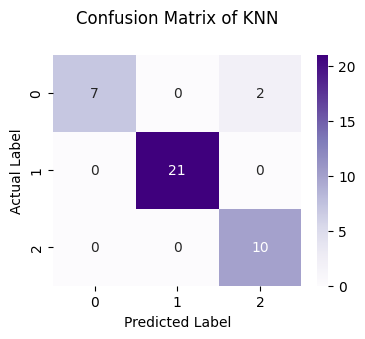

In [69]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of KNN",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       1.00      1.00      1.00        21
           2       0.83      1.00      0.91        10

    accuracy                           0.95        40
   macro avg       0.94      0.93      0.93        40
weighted avg       0.96      0.95      0.95        40

